In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [30]:
state_list = pd.read_csv("./data/State_dict.csv")
state_list.head()

,state,name
0,11,Maine
1,12,New Hampshire
2,13,Vermont
3,14,Massachusetts
4,15,Rhode Island


In [53]:
state_dict = state_list.set_index('state')['name'].to_dict()

In [54]:
state_dict

{11: 'Maine',
 12: 'New Hampshire',
 13: 'Vermont',
 14: 'Massachusetts',
 15: 'Rhode Island',
 16: 'Connecticut',
 21: 'New York',
 22: 'New Jersey',
 23: 'Pennsylvania',
 31: 'Ohio',
 32: 'Indiana',
 33: 'Illinois',
 34: 'Michigan',
 35: 'Wisconsin',
 41: 'Minnesota',
 42: 'Iowa',
 43: 'Missouri',
 44: 'North Dakota',
 45: 'South Dakota',
 46: 'Nebraska',
 47: 'Kansas',
 51: 'Delaware',
 52: 'Maryland',
 53: 'Washington, D.C.',
 54: 'Virginia',
 55: 'West Virginia',
 56: 'North Carolina',
 57: 'South Carolina',
 58: 'Georgia',
 59: 'Florida',
 61: 'Kentucky',
 62: 'Tennessee',
 63: 'Alabama',
 64: 'Mississippi',
 71: 'Arkansas',
 72: 'Louisiana',
 73: 'Oklahoma',
 74: 'Texas',
 81: 'Montana',
 82: 'Idaho',
 83: 'Wyoming',
 84: 'Colorado',
 85: 'New Mexico',
 86: 'Arizona',
 87: 'Utah',
 88: 'Nevada',
 91: 'Washington',
 92: 'Oregon',
 93: 'California',
 94: 'Alaska',
 95: 'Hawaii'}

In [55]:
kieadata15.state_names = kieadata15.state.map(state_dict)

In [56]:
kieadata15.head()

,pid,grdatn,age,female,immigr,msafp,msastat,natvty,race,region,state,year,yeart1,faminc,state_names
0,15866200851 3111 11912,42,57,1,0,49340,2,57,1,1,14,2014,2015,15,Massachusetts
1,15866200851 3111 21912,39,26,0,0,49340,2,57,1,1,14,2014,2015,15,Massachusetts
2,17286201521 3011 11912,41,43,0,0,0,4,110,1,2,41,2014,2015,12,Minnesota
3,17286201521 3011 21912,39,38,1,0,0,4,57,1,2,41,2014,2015,12,Minnesota
4,43549100171 3011 11912,42,51,0,0,12060,2,57,1,3,58,2014,2015,13,Georgia


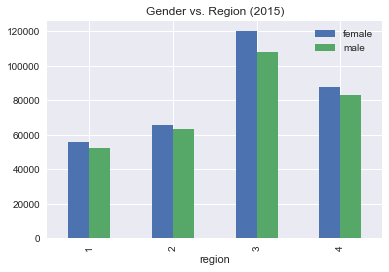

In [88]:
# Looking for correlations
female = kieadata15[kieadata15['female'] == True].groupby('region').size()
male = kieadata15[kieadata15['female'] == False].groupby('region').size()

data = pd.concat([female, male], axis=1)
data.columns = ['female', 'male']
data.plot.bar(title='Gender vs. Region (2015)')

In [90]:
female.sum()

329485

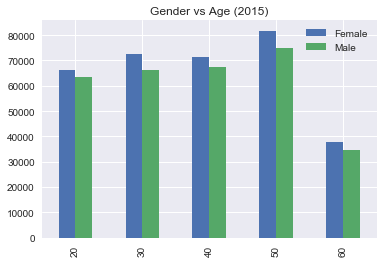

In [72]:
def f(age):  
    try:
        return int(age/10)*10
    except:
        pass
    
female = kieadata15[kieadata15['female'] == True].copy().set_index('age').groupby(f).size()
male = kieadata15[kieadata15['female'] == False].copy().set_index('age').groupby(f).size()
data = pd.concat([female, male], axis=1)
data.columns = ['Female', 'Male']
data.plot.bar(title='Gender vs Age (2015)')

In [66]:
# sns.barplot(kieadata15.age,kieadata15.faminc)

In [78]:
kieadata96 = pd.read_csv("./data/kieadata1996.csv")

kieadata96 = kieadata96[['pid', 'grdatn','age','female','immigr',
           'msafp', 'natvty', 'race', 'region', 'state','year','faminc']]

kieadata96.head()

,pid,grdatn,age,female,immigr,msafp,natvty,race,region,state,year,faminc
0,68138420610 1 1 1 1,43,27,0,0,3360,57,1,3,74,1996,10
1,68138420610 1 2 1 1,43,23,1,0,3360,57,1,3,74,1996,10
2,567099102899 1 1 1 1,43,43,0,0,4480,57,1,4,93,1996,14
3,567099102899 1 2 1 1,43,42,1,0,4480,57,1,4,93,1996,14
4,604270694297 1 1 1 1,44,35,1,0,5360,57,1,3,62,1996,12


In [82]:
# kieadata96.isnull().sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A6A6A90B00>,
      dtype=object)

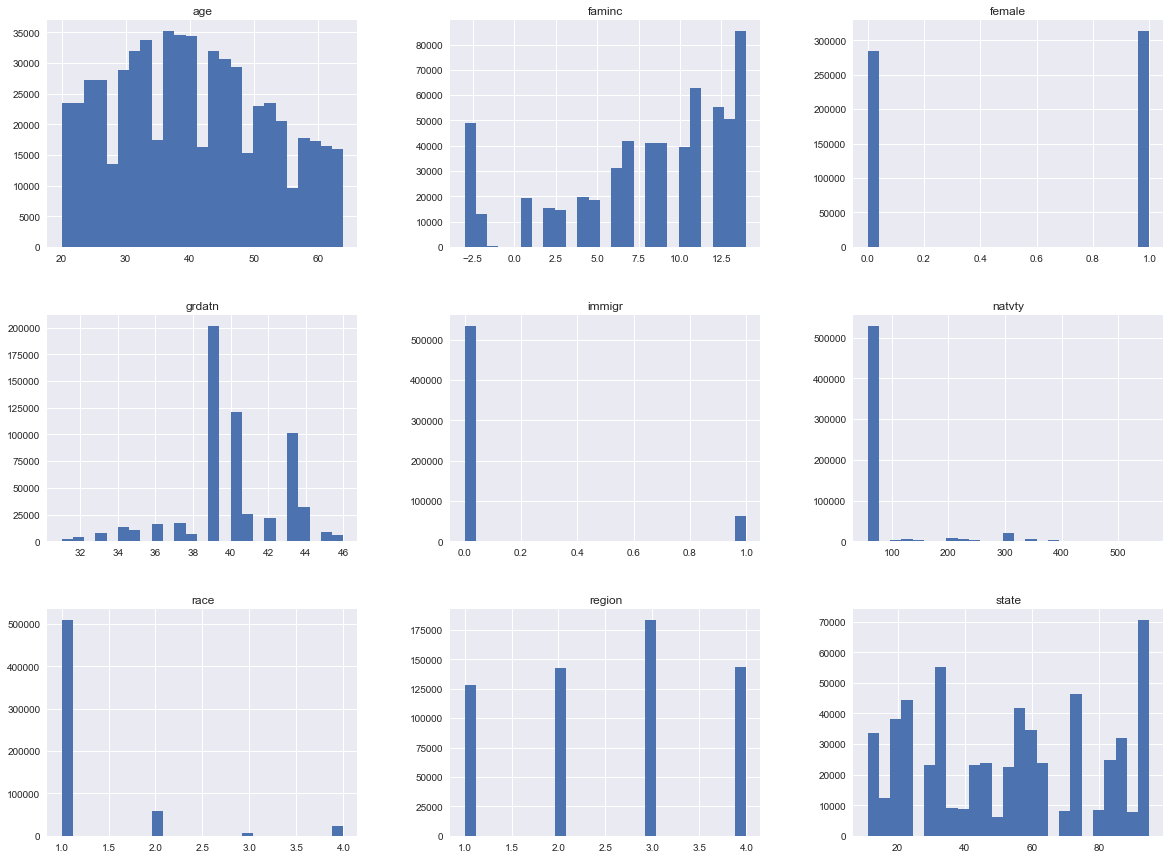

In [70]:
# A quick view of all the important features
fields = ['grdatn','age','female','immigr','natvty', 'race', 'region', 'state','faminc']
kieadata96[fields].hist(bins=25, figsize=(20,15))

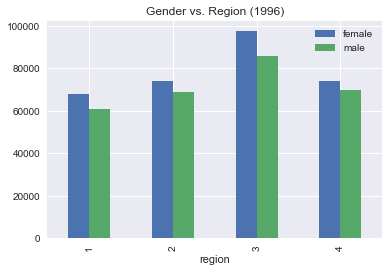

In [73]:
# Looking for correlations
female = kieadata96[kieadata96['female'] == True].groupby('region').size()
male = kieadata96[kieadata96['female'] == False].groupby('region').size()

data = pd.concat([female, male], axis=1)
data.columns = ['female', 'male']
data.plot.bar(title='Gender vs. Region (1996)')

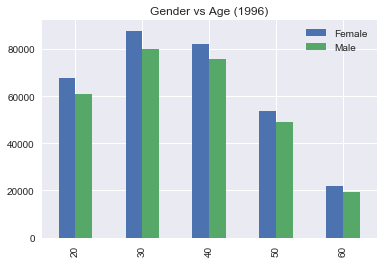

In [91]:
def f(age):  
    try:
        return int(age/10)*10
    except:
        pass
    
female = kieadata96[kieadata96['female'] == True].copy().set_index('age').groupby(f).size()
male = kieadata96[kieadata96['female'] == False].copy().set_index('age').groupby(f).size()
data = pd.concat([female, male], axis=1)
data.columns = ['Female', 'Male']
data.plot.bar(title='Gender vs Age (1996)')

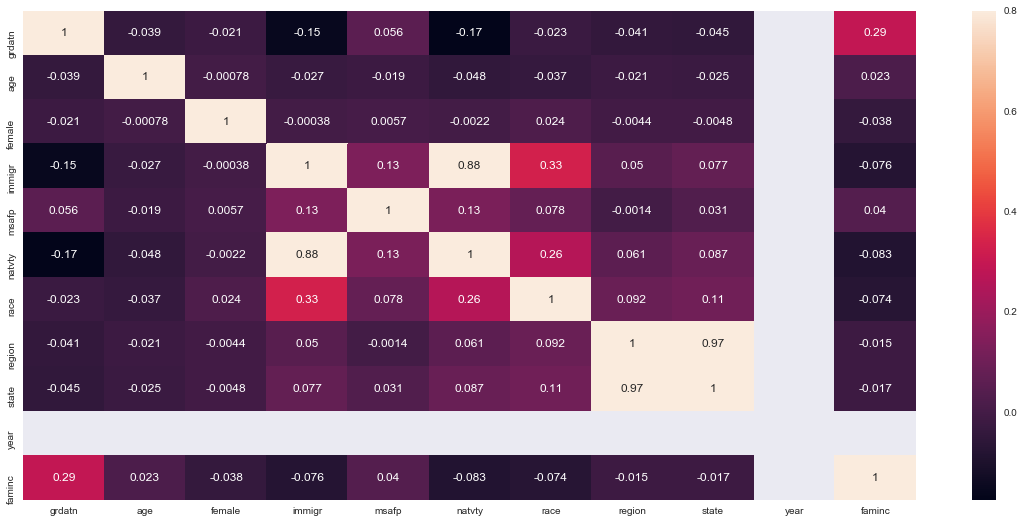

In [80]:
#correlation matrix
corrmat = kieadata96.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [100]:
SBO = pd.read_csv("./data/SBO_2012_00CSA01_with_ann.csv")
SBO.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'NAICS.id',
       'NAICS.display-label', 'SEX.id', 'SEX.display-label', 'ETH_GROUP.id',
       'ETH_GROUP.display-label', 'RACE_GROUP.id', 'RACE_GROUP.display-label',
       'YEAR.id', 'FIRMALL', 'RCPALL', 'FIRMPDEMP', 'RCPPDEMP', 'EMP',
       'PAYANN', 'FIRMNOPD', 'RCPNOPD', 'FIRMALL_S', 'RCPALL_S', 'FIRMPDEMP_S',
       'RCPPDEMP_S', 'EMP_S', 'PAYANN_S', 'FIRMNOPD_S', 'RCPNOPD_S'],
      dtype='object')

In [132]:
SBO

,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
0,Geographic identifier code,Id2,Geographic area name,2012 NAICS code,Meaning of 2012 NAICS code,Gender code,Meaning of Gender code,Ethnicity code,Meaning of Ethnicity code,Race code,...,Number of firms without paid employees,"Sales, receipts, or value of shipments of firm...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of paid empl...,Relative standard error of annual payroll (%),Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or..."
1,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,00,...,22201902,1041586434,0.1,0.2,0.1,0.2,0.4,0.1,0.1,0.6
2,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,30,...,17101796,846365483,0.1,0.4,0.1,0.4,0.8,0.2,0.1,0.5
3,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,40,...,2475266,46751654,0.1,1.3,1.2,1.8,2.1,1.4,0.1,0.9
4,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,50,...,246740,7183960,0.5,6.7,2.3,8.8,3.8,5.4,0.4,1.6
5,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,60,...,1436876,71960023,0.2,0.7,0.4,0.9,1.3,1.1,0.3,1.6
6,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,61,...,239766,17369692,0.7,2.1,0.9,2.3,3.0,1.8,1.2,3.4
7,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,62,...,389685,19459412,0.6,2.3,1.2,2.8,2.0,2.6,0.8,2.5
8,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,63,...,168788,5384749,0.9,6.5,2.5,8.2,7.6,8.1,1.1,4.0
9,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,64,...,95257,4252556,1.0,2.9,3.1,3.7,2.8,2.5,1.2,6.5


In [125]:
SBO[SBO['SEX.display-label'] == 'Female-owned']

,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
51,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,00,...,8842742,229247857,0.1,0.6,0.2,0.7,0.8,0.7,0.1,0.6
52,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,30,...,6303834,178492696,0.1,0.6,0.3,0.7,0.9,0.7,0.1,0.9
53,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,40,...,1482886,20717275,0.1,2.5,1.9,4.9,4.6,5.6,0.1,1.5
54,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,50,...,123305,2328274,0.9,4.4,3.6,6.1,5.9,7.8,0.8,2.1
55,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,60,...,622869,22735025,0.5,2.0,1.0,2.7,5.3,2.3,0.5,2.6
56,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,61,...,67796,3500094,1.3,3.9,2.9,3.9,5.8,4.8,2.3,9.7
57,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,62,...,168487,6280733,1.0,5.8,3.0,6.9,4.8,5.6,1.2,2.7
58,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,63,...,87967,2360663,1.1,6.5,3.3,10.0,6.8,5.7,1.3,5.2
59,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,64,...,47211,1654259,1.1,8.9,9.2,11.8,13.3,12.4,1.7,14.6
60,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,65,...,65830,3044414,1.1,3.6,3.3,4.7,4.9,5.6,1.6,8.4


In [143]:
# SBO[SBO['SEX.display-label'] == 'Male-owned' & SBO['RACE_GROUP.display-label'] == 'White']

SBO[SBO['RACE_GROUP.display-label'] == 'White' ]

,GEO.id,GEO.id2,GEO.display-label,NAICS.id,NAICS.display-label,SEX.id,SEX.display-label,ETH_GROUP.id,ETH_GROUP.display-label,RACE_GROUP.id,...,FIRMNOPD,RCPNOPD,FIRMALL_S,RCPALL_S,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,FIRMNOPD_S,RCPNOPD_S
2,0100000US,NaN,United States,00,Total for all sectors,001,All firms,001,All firms,30,...,17101796,846365483,0.1,0.4,0.1,0.4,0.8,0.2,0.1,0.5
25,0100000US,NaN,United States,00,Total for all sectors,001,All firms,020,Hispanic,30,...,1951294,63671187,0.2,1.5,1.1,1.9,1.4,1.8,0.1,1.0
36,0100000US,NaN,United States,00,Total for all sectors,001,All firms,028,Equally Hispanic/non-Hispanic,30,...,65448,4681138,1.5,6.2,2.7,7.4,5.6,4.3,1.8,5.4
43,0100000US,NaN,United States,00,Total for all sectors,001,All firms,029,Non-Hispanic,30,...,15085055,778013158,0.1,0.4,0.2,0.5,0.8,0.3,0.1,0.5
52,0100000US,NaN,United States,00,Total for all sectors,002,Female-owned,001,All firms,30,...,6303834,178492696,0.1,0.6,0.3,0.7,0.9,0.7,0.1,0.9
80,0100000US,NaN,United States,00,Total for all sectors,003,Male-owned,001,All firms,30,...,9347392,566904562,0.1,0.5,0.1,0.5,1.0,0.2,0.1,0.5
108,0100000US,NaN,United States,00,Total for all sectors,004,Equally male-/female-owned,001,All firms,30,...,1450569,100968225,0.4,1.0,0.6,1.1,1.3,0.6,0.6,1.7
138,0100000US,NaN,United States,11(606),"Agriculture, forestry, fishing and hunting(606)",001,All firms,001,All firms,30,...,211919,9310563,0.4,1.8,0.8,2.3,5.5,2.5,0.3,2.2
161,0100000US,NaN,United States,11(606),"Agriculture, forestry, fishing and hunting(606)",001,All firms,020,Hispanic,30,...,11601,323867,2.8,11.1,14.4,14.6,15.6,15.2,2.6,11.9
172,0100000US,NaN,United States,11(606),"Agriculture, forestry, fishing and hunting(606)",001,All firms,028,Equally Hispanic/non-Hispanic,30,...,665,43742,17.3,25.4,22.8,31.6,16.3,18.2,17.4,32.1


### Establishment Characteristics Data Tables

https://www.census.gov/ces/dataproducts/bds/data_estab.html

In [2]:
economy_wide = pd.read_csv("./data/Economy_Wide.csv")
economy_wide.head()

,year2,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,...,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp
0,1977,3417903,4153792,66091812,63987631,697749,17.1,526010,12.9,13919514,...,3909657,5801496,6.1,15.2,4208361,6.6,30.4,350748,352967,2224963
1,1978,3470239,4222683,69670352,67833282,626813,15.0,548965,13.1,14062357,...,4283093,6105123,6.3,15.3,3674141,5.4,30.6,360442,362456,2123414
2,1979,3598075,4376325,74016678,71830680,641788,14.9,471892,11.0,14443176,...,3639187,6431992,5.1,14.0,4371997,6.1,28.0,293251,294890,1667500
3,1980,3606457,4398753,74749924,74284989,580305,13.2,524356,12.0,12718175,...,3948087,7840218,5.3,15.9,929870,1.2,31.8,371483,373364,2123575
4,1981,3566572,4341224,73539034,73601473,577646,13.2,609342,14.0,12783982,...,5037764,7871097,6.8,17.5,-124879,-0.1,34.8,365741,367682,2132961


In [3]:
economy_wide.columns

Index(['year2', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp'],
      dtype='object')

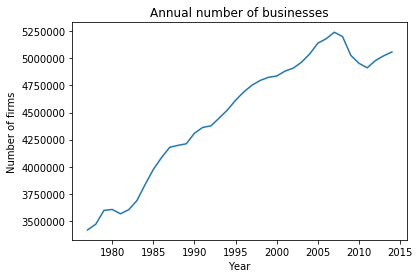

In [4]:
plt.plot(economy_wide.year2, economy_wide.firms)
plt.xlabel("Year")
plt.ylabel("Number of firms")
plt.title("Annual number of businesses")
plt.show()

### Business Dynamics Statistics
#### Firm Characteristics Data Tables
https://www.census.gov/ces/dataproducts/bds/data_firm.html

In [5]:
state = pd.read_csv("./data/State.csv")
state.tail(10)

,year2,state,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,d_flag,firmdeath_firms,firmdeath_estabs,firmdeath_emp
1928,2014,46,19063,23189,339014,335372,1881,8.1,1782,7.7,...,21904,3.1,9.7,7285,2.1,19.4,0,1237,1245,6960.0
1929,2014,47,87080,121014,2429351,2404197,10849,9.0,9572,8.0,...,185167,3.1,10.8,50309,2.0,21.6,0,6773,6789,40140.0
1930,2014,48,370629,503220,9728017,9588803,54930,11.1,42352,8.5,...,792510,4.1,12.4,278428,2.9,24.8,0,29434,29618,206041.0
1931,2014,49,51483,62972,1117111,1100704,7502,12.1,5932,9.5,...,91272,3.6,11.9,32815,2.9,23.8,0,3944,3949,23959.0
1932,2014,50,15838,18658,259772,257443,1544,8.3,1474,7.9,...,16858,2.9,9.4,4659,1.9,18.8,0,970,979,5274.0
1933,2014,51,132515,176856,3117342,3089692,16748,9.5,14495,8.2,...,259237,3.1,11.5,55299,1.8,23.0,0,9758,9812,48934.0
1934,2014,53,126327,157519,2448627,2408827,16724,10.7,13997,9.0,...,168511,3.5,10.5,79600,3.3,21.0,0,9494,9552,49150.0
1935,2014,54,25226,34280,568774,567485,2415,7.0,2751,8.0,...,44427,3.8,11.6,2578,0.5,23.2,0,1871,1884,10387.0
1936,2014,55,95287,124208,2426438,2403983,9666,7.8,8894,7.2,...,158049,2.7,9.3,44910,1.8,18.6,0,5960,6005,39250.0
1937,2014,56,15510,18322,212454,210856,1801,9.9,1597,8.8,...,19207,3.7,12.8,3197,1.5,25.6,0,1072,1074,4098.0


In [423]:
# state[state.state == 50]

In [7]:
# extracting table of state codes from:
# https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm

from urllib.request import urlopen
from bs4 import BeautifulSoup as BS
import urllib.request

# url
url = "https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm"

#http request
request=urllib.request.Request(url)

#result of the request
result=urllib.request.urlopen(request)

#read & store the result
resulttext=result.read()

#create the BeautifulSoup object by passing read reseult to the BeautifulSoup
soup = BS(resulttext, 'html.parser')

# print the output
print(soup.prettify())

# scrape the table oject
table = soup.find("table")

# print the table
print(table)

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <meta content="Microsoft FrontPage 4.0" name="GENERATOR">
    <meta content="FrontPage.Editor.Document" name="ProgId">
     <title>
      State FIPS Code Listing
     </title>
    </meta>
   </meta>
  </meta>
 </head>
 <body>
  <p align="center">
   <br>
    <b>
     <font size="+3">
      State FIPS Code Listing
     </font>
    </b>
    <p align="center">
     <img border="0" height="172" src="images/state_6.gif" width="733">
      <hr>
       <h3 align="center">
        Click on the highlighted State abbreviation for a list of
Counties and County FIPS codes.
       </h3>
       <div align="center">
        <center>
         <table border="1" width="687">
          <tbody>
           <tr>
            <td align="center" width="85">
             <strong>
              State Abbreviation
             </strong>
            </td>
            <td align="center" width="46">
             <strong>
        

In [8]:
# create empty data df
data = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    cells = [ele.text.strip() for ele in cells]
    data.append(cells)
    eq_df = pd.DataFrame(data, columns=['abbr1','code1','name1','abbr2','code2','name2'])
    eq_df = eq_df.drop(0,0)

# confirm dataframe:

eq_df.head() 

,abbr1,code1,name1,abbr2,code2,name2
1,AK,02,ALASKA,MS,28,MISSISSIPPI
2,AL,01,ALABAMA,MT,30,MONTANA
3,AR,05,ARKANSAS,NC,37,NORTH CAROLINA
4,AS,60,AMERICAN SAMOA,ND,38,NORTH DAKOTA
5,AZ,04,ARIZONA,NE,31,NEBRASKA


In [9]:
eq_df.columns

Index(['abbr1', 'code1', 'name1', 'abbr2', 'code2', 'name2'], dtype='object')

In [10]:
eq_df1 = eq_df[['abbr1','code1', 'name1']]
eq_df2 = eq_df[['abbr2', 'code2', 'name2']]
eq_df1.columns = ['st_abbr','st_code', 'st_name']
eq_df2.columns = ['st_abbr','st_code', 'st_name']

In [424]:
df3 = pd.merge(eq_df1, eq_df2, on=['st_code','st_abbr','st_name'], how='outer')
# df3

Because the original webpage had the table in 2 columns with a gap at the index = 27, it needs to be dropped 

In [12]:
df3.shape

(56, 3)

In [13]:
# df3.iloc[27]
df4 = df3.drop(df3.index[27])
df4.shape

(55, 3)

In [14]:
df4.st_code = pd.to_numeric(df4.st_code, errors='coerce')
df4.dtypes

st_abbr    object
st_code     int64
st_name    object
dtype: object

In [425]:
state_code_dict = df4.set_index('st_code')['st_abbr'].to_dict()
# state_code_dict 

In [16]:
state['state_names'] = state['state'].map(state_code_dict)

In [426]:
TN = state[state.state_names == 'TN']
# TN

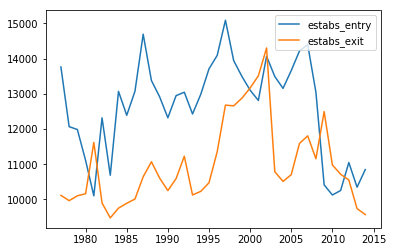

In [28]:
plt.plot(TN.year2, TN['estabs_entry'])
plt.plot(TN.year2, TN['estabs_exit'])
plt.legend()
plt.show()

In [19]:
TN.columns

Index(['year2', 'state', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'd_flag', 'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp',
       'state_names'],
      dtype='object')

#### Looking into global data

In [482]:
share_of_women_inventors = pd.read_csv("data/GENDER_ENT1_29062018020347129.csv", 
                                       usecols=['LOCATION','Country', 'Time', 'Value'])

share_of_women_inventors = share_of_women_inventors.rename(columns={'Value': 'women_inventors'})
share_of_women_inventors.head()

,LOCATION,Country,Time,women_inventors
0,NLD,Netherlands,2000,7.11584
1,NLD,Netherlands,2001,7.30398
2,NLD,Netherlands,2002,7.20783
3,NLD,Netherlands,2003,7.17771
4,NLD,Netherlands,2004,7.08478


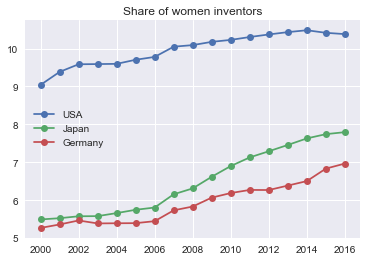

In [491]:
GER_inv = share_of_women_inventors[share_of_women_inventors.LOCATION == 'DEU']
USA_inv = share_of_women_inventors[share_of_women_inventors.LOCATION == 'USA']
JAP_inv = share_of_women_inventors[share_of_women_inventors.Country == 'Japan']
_ = plt.plot(USA_inv.Time, USA_inv.women_inventors, '-o',label = "USA")
_ = plt.plot(JAP_inv.Time, JAP_inv.women_inventors, '-o',label="Japan")
_ = plt.plot(GER_inv.Time, GER_inv.women_inventors, '-o',label="Germany")
plt.legend()
plt.title("Share of women inventors")
plt.show()

####  Share of the population with account in a financial institution, by sex

Percentage of respondents who reported having an account (by themselves or together with someone else) at a bank or another type of financial institution (% age 15+).

https://stats.oecd.org/index.aspx?queryid=54682

In [321]:
share_with_account_in_bank = pd.read_csv("data/GENDER_ENT1_29062018022417846.csv", usecols=
                                                                         ['LOCATION','Country','Sex','Time','Value'])
share_with_account_in_bank = share_with_account_in_bank.rename(columns={'Value': 'account_holders'})
share_with_account_in_bank.head()

,LOCATION,Country,Sex,Time,account_holders
0,AUS,Australia,Men,2011,99.595
1,AUS,Australia,Men,2014,98.671
2,AUS,Australia,Women,2011,98.592
3,AUS,Australia,Women,2014,99.036
4,AUT,Austria,Men,2011,97.737


#### Self-employed without employees

https://data.oecd.org/entrepreneur/self-employed-without-employees.htm

Those who are self-employed without employees are people whose primary activity is self-employment and do not employ others. 

In [365]:
df_sewoe = pd.read_csv("data/DP_LIVE_29062018030723133.csv", 
                                         usecols=['LOCATION','SUBJECT','TIME','Value'])

df_sewoe = df_sewoe.rename(columns={'Value': 'sewoe', 'SUBJECT':'Sex', 'TIME':'Time'})
df_sewoe.head()

,LOCATION,Sex,Time,sewoe
0,AUS,MEN,2013,12.54569
1,AUS,MEN,2014,12.81071
2,AUS,MEN,2015,12.90830
3,AUS,MEN,2016,12.82426
4,AUS,MEN,2017,12.68490


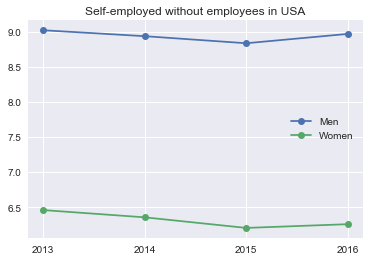

In [510]:
USA_sewoe_men = df_sewoe[(df_sewoe.LOCATION == 'USA') & (df_sewoe.Sex == 'MEN')]
USA_sewoe_women = df_sewoe[(df_sewoe.LOCATION == 'USA') & (df_sewoe.Sex != 'MEN')]

men = plt.plot(USA_sewoe_men.Time, USA_sewoe_men.sewoe, '-o',label='Men')
women = plt.plot(USA_sewoe_women.Time, USA_sewoe_women.sewoe, '-o',label='Women')

plt.legend()
plt.title("Self-employed without employees in USA")

x = [2013, 2014, 2015, 2016]
plt.xticks(x)

plt.show()

#### Self-employed with employees

https://data.oecd.org/entrepreneur/self-employed-with-employees.htm#indicator-chart

Those who are self-employed with employees are people whose primary activity is self-employment and who employ others. 

In [337]:
df_sewe = pd.read_csv("data/DP_LIVE_30062018163039939.csv", 
                                         usecols=['LOCATION','SUBJECT','TIME','Value'])
df_sewe = df_sewe.rename(columns={'Value': 'sewe', 'SUBJECT':'Sex', 'TIME':'Time'})
df_sewe.head()

,LOCATION,Sex,Time,sewe
0,AUS,MEN,1991,9.026331
1,AUS,MEN,1992,8.799062
2,AUS,MEN,1993,8.768209
3,AUS,MEN,1994,8.980591
4,AUS,MEN,1995,9.063630


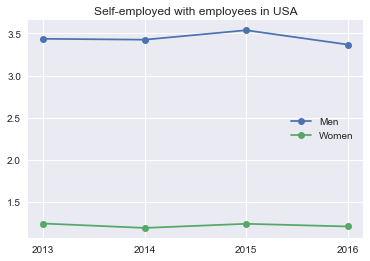

In [512]:
USA_sewe_men = df_sewe[(df_sewe.LOCATION == 'USA') & (df_sewe.Sex == 'MEN')]
USA_sewe_women = df_sewe[(df_sewe.LOCATION == 'USA') & (df_sewe.Sex != 'MEN')]

men = plt.plot(USA_sewe_men.Time, USA_sewe_men.sewe, '-o',label='Men')
women = plt.plot(USA_sewe_women.Time, USA_sewe_women.sewe, '-o',label='Women')

plt.legend()
plt.title("Self-employed with employees in USA")

x = [2013, 2014, 2015, 2016]
plt.xticks(x)
plt.show()

In [367]:
# merge datasets
merged = pd.merge(df_sewe, df_sewoe, on=['LOCATION','Sex','Time'], how='inner')
MEN_WOMEN_Dict = {'MEN':'Men', 'WOMEN':'Women'}
merged["Sex"].replace(MEN_WOMEN_Dict, inplace=True)
merged.head()

,LOCATION,Sex,Time,sewe,sewoe
0,AUS,Men,2013,7.982447,12.54569
1,AUS,Men,2014,7.984218,12.81071
2,AUS,Men,2015,7.791142,12.90830
3,AUS,Men,2016,7.894125,12.82426
4,AUS,Men,2017,7.967227,12.68490


#### Share of self-employed in the population of employed with foreign-citizenship, by sex

Number of self-employed with foreign citizenship divided by the total number of employed with foreign citizenship, multiplied by 100.

http://www.oecd.org/gender/data/entrepreneurship/#d.en.387805

In [380]:
df_immigrants = pd.read_csv("data/GENDER_ENT1_30062018165109135.csv", 
                           usecols=['LOCATION','Country','Sex', 'Time', 'Value'])

df_immigrants = df_immigrants.rename(columns={'Value': 'immigrants'})
df_immigrants.head()

,LOCATION,Country,Sex,Time,immigrants
0,EST,Estonia,Women,2000,0.0
1,EST,Estonia,Women,2001,0.0
2,EST,Estonia,Women,2002,0.0
3,EST,Estonia,Women,2003,0.0
4,EST,Estonia,Women,2004,0.0


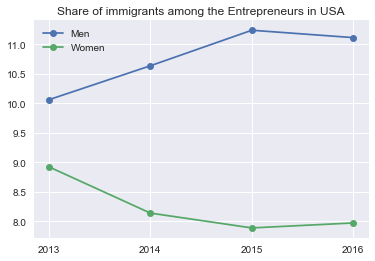

In [513]:
USA_immigrant = df_immigrants[df_immigrants.LOCATION == 'USA']

USA_immigrant_Men = USA_immigrant[USA_immigrant.Sex == 'Men']
USA_immigrant_Women = USA_immigrant[USA_immigrant.Sex == 'Women']

_ = plt.plot(USA_immigrant_Men.Time, USA_immigrant_Men.immigrants, '-o',label = 'Men')
_ = plt.plot(USA_immigrant_Women.Time,  USA_immigrant_Women.immigrants ,'-o', label = 'Women')      
plt.legend()
x = [2013, 2014, 2015, 2016]
plt.title("Share of immigrants among the Entrepreneurs in USA")
plt.xticks(x)
plt.show()

In [381]:
# continuing with merging the datasets
merged1 = pd.merge(merged, df_immigrants, on=['LOCATION', 'Sex', 'Time'], how='inner')
merged1[merged1.LOCATION == 'USA']

,LOCATION,Sex,Time,sewe,sewoe,Country,immigrants
175,USA,Men,2013,3.436669,9.023876,United States,10.062810
176,USA,Men,2014,3.426350,8.939144,United States,10.638830
177,USA,Men,2015,3.538436,8.838509,United States,11.241530
178,USA,Men,2016,3.368583,8.971304,United States,11.116360
179,USA,Women,2013,1.244525,6.457914,United States,8.923826
180,USA,Women,2014,1.192194,6.354481,United States,8.139024
181,USA,Women,2015,1.240980,6.203463,United States,7.887560
182,USA,Women,2016,1.209291,6.256702,United States,7.971888


#### Earning gap in self-employment, by sex

The earning gap is unadjusted and defined as the difference between male and female average self-employment incomes divided by the male average self-employment income, and multiplied by 100, age 18 year old or more (CAN: 15 year old or more).

https://stats.oecd.org

In [199]:
earning_gap = pd.read_csv("data/GENDER_ENT1_06072018021134334.csv", 
                  usecols=['LOCATION', 'Country', 'Time', 'Value'])
earning_gap.head()

,LOCATION,Country,Time,Value
0,AUT,Austria,2003,51.79602
1,AUT,Austria,2004,49.96608
2,AUT,Austria,2005,49.89719
3,AUT,Austria,2006,47.26454
4,AUT,Austria,2007,48.46805


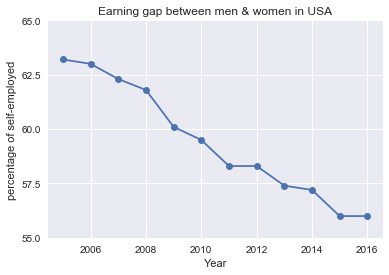

In [520]:
data = earning_gap[earning_gap.LOCATION == 'USA']
plt.plot(data.Time, data.Value, '-o', label = 'Earning gap')
# plt.legend()
plt.title("Earning gap between men & women in USA")
plt.xlabel("Year")
plt.ylabel("percentage of self-employed")
plt.ylim(55, 65)
y = [55, 57.5, 60, 62.5, 65]
plt.yticks(y)
plt.show()

####  Share of self-employed in the population of employed with tertiary education, by sex

https://stats.oecd.org/index.aspx?queryid=70616

Number of self-employed with tertiary education divided by the total number of employed with tertiary education, multiplied by 100. Tertiary education refer to Bachelor level and higher degrees. Data refer to 15-64 year old, with exception for USA: 25 year old or more

In [386]:
tert_edu = pd.read_csv("data/GENDER_ENT1_06072018030623642.csv", 
                       usecols=['LOCATION', 'Country', 'Sex', 'Time', 'Value'])
tert_edu = tert_edu.rename(columns={'Value': 'tert_edu'})
tert_edu.head()

,LOCATION,Country,Sex,Time,tert_edu
0,ISL,Iceland,Women,2000,9.433963
1,ISL,Iceland,Women,2001,7.142858
2,ISL,Iceland,Women,2002,8.187135
3,ISL,Iceland,Women,2003,6.500000
4,ISL,Iceland,Women,2004,10.101010


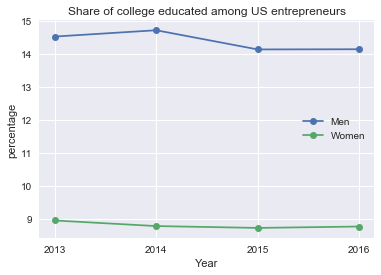

In [522]:
data_women = tert_edu[(tert_edu.LOCATION == 'USA') & (tert_edu.Sex == 'Women')]
data_men = tert_edu[(tert_edu.LOCATION == 'USA') & (tert_edu.Sex == 'Men')]

_ = plt.plot(data_men.Time, data_men.tert_edu, '-o', label = 'Men')
_ = plt.plot(data_women.Time, data_women.tert_edu, '-o', label = 'Women')
plt.legend()
plt.title("Share of college educated among US entrepreneurs")
x = [2013, 2014, 2015, 2016]
plt.xticks(x)
plt.xlabel("Year")
plt.ylabel("percentage")
plt.show()

In [463]:
# continuing with merging the datasets
merged2 = pd.merge(merged1, tert_edu, on=['LOCATION', 'Sex', 'Time', 'Country'], how='inner')
merged2[merged2.LOCATION == 'USA']

,LOCATION,Sex,Time,sewe,sewoe,Country,immigrants,tert_edu
175,USA,Men,2013,3.436669,9.023876,United States,10.062810,14.525810
176,USA,Men,2014,3.426350,8.939144,United States,10.638830,14.717390
177,USA,Men,2015,3.538436,8.838509,United States,11.241530,14.136040
178,USA,Men,2016,3.368583,8.971304,United States,11.116360,14.141720
179,USA,Women,2013,1.244525,6.457914,United States,8.923826,8.951109
180,USA,Women,2014,1.192194,6.354481,United States,8.139024,8.782211
181,USA,Women,2015,1.240980,6.203463,United States,7.887560,8.726067
182,USA,Women,2016,1.209291,6.256702,United States,7.971888,8.768324


#### Population with tertiary education
those having completed the highest level of education, by age group. This includes both theoretical programmes leading to advanced research or high skill professions such as medicine and more vocational programmes leading to the labour market. 

https://data.oecd.org/eduatt/population-with-tertiary-education.htm#indicator-chart

In [524]:
college_educated = pd.read_csv("data/DP_LIVE_06072018035330461.csv", 
                               usecols=['LOCATION', 'TIME', 'SUBJECT','Value'])

college_educated = college_educated.rename(columns={'SUBJECT':'Age_group', 'Value': 'pop_tert_edu'})
college_educated.tail()

,LOCATION,Age_group,TIME,pop_tert_edu
3300,G20,35_44,2011,31.741166
3301,G20,45_54,2010,27.372598
3302,G20,45_54,2011,26.612998
3303,G20,55_64,2010,21.678365
3304,G20,55_64,2011,22.429290


Text(31.3127,0.5,'% in same age group')

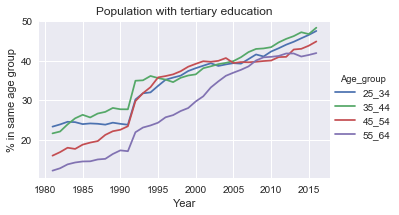

In [525]:
_ages= ['25_34', '35_44', '45_54', '55_64']
college_educated_USA = college_educated[college_educated.LOCATION == 'USA']
fg = sns.FacetGrid(data=college_educated_USA, hue='Age_group', hue_order=_ages, aspect=1.61)
fg.map(plt.plot, 'TIME', 'pop_tert_edu').add_legend()
plt.title('Population with tertiary education')
plt.xlabel('Year')
plt.ylabel('% in same age group')

#### Adult education level
the highest level of education completed by (%) of 25-64 year-olds population
* below upper-secondary (BUPPSRY)
* upper secondary (UPPSRY)
* tertiary education (TRY): broken down by gender (TRY_MEN & TRY_WOMEN)
https://data.oecd.org/eduatt/adult-education-level.htm

In [390]:
education = pd.read_csv("data/DP_LIVE_07072018171828812.csv",
                       usecols=['LOCATION','SUBJECT','TIME','Value'])
education.head()

,LOCATION,SUBJECT,TIME,Value
0,AUS,BUPPSRY,1989,44.650639
1,AUS,BUPPSRY,1991,44.127056
2,AUS,BUPPSRY,1993,47.159046
3,AUS,BUPPSRY,1994,49.802025
4,AUS,BUPPSRY,1995,44.935852


In [532]:
# education[(education.LOCATION == 'USA')&(education.TIME==2016)]
education[(education.LOCATION == 'USA') & (education.SUBJECT == 'TRY_WOMEN')];

Text(36.054,0.5,'(%) of 25-64 year-olds')

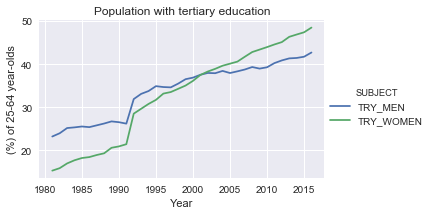

In [531]:
_men_women= ['TRY_MEN', 'TRY_WOMEN']
tert_educated_USA = education[education.LOCATION == 'USA']
fg = sns.FacetGrid(data=tert_educated_USA, hue='SUBJECT', hue_order=_men_women, aspect=1.61)
fg.map(plt.plot, 'TIME', 'Value').add_legend()
plt.title('Population with tertiary education')
plt.xlabel('Year')
plt.ylabel('(%) of 25-64 year-olds')

In [533]:
# fg = sns.FacetGrid(data=entreprenuership[entreprenuership.LOCATION=='USA'], hue='Sex', aspect=1.61)
# fg.map(plt.plot, 'Time', 'Value').add_legend()
# plt.title("Share of entrepreneurs in USA")
# x=[2013,2014,2015,2016]
# plt.xticks(x)
# plt.ylabel("% population")

###  Share of employed who are managers, by sex

Number employed in jobs classified in International Standard Classification of Occupations (ISCO) 08 category 1 (as managers), as a percentage of total people in employment.

https://stats.oecd.org/index.aspx?queryid=54752

In [461]:
managers = pd.read_csv("data/GENDER_EMP_11072018033831323.csv",
                      usecols=['COU', 'Country','Sex','Time','Value'])
managers = managers.rename(columns={'COU':'LOCATION','Value': 'managers'})
managers.head(2)

,LOCATION,Country,Sex,Time,managers
0,AUT,Austria,Men,2011,6.8
1,AUT,Austria,Women,2011,3.0


In [538]:
# continuing with merging the datasets
# merged3 = pd.merge(merged2, managers, on=['LOCATION', 'Sex', 'Time', 'Country'], how='inner')
# merged4 = pd.merge(merged3, share_of_women_inventors, on=['LOCATION', 'Time', 'Country'], how='inner')
# merged5 = pd.merge(merged4, young_self_employed, on=['LOCATION', 'Time', 'Country'], how='inner')
merged3[merged3.LOCATION == 'USA']

,LOCATION,Sex,Time,sewe,sewoe,Country,immigrants,tert_edu,managers,women_inventors
167,USA,Men,2013,3.436669,9.023876,United States,10.062810,14.525810,16.9,10.43449
168,USA,Women,2013,1.244525,6.457914,United States,8.923826,8.951109,14.6,10.43449


In [505]:
merged3.shape

(193, 10)

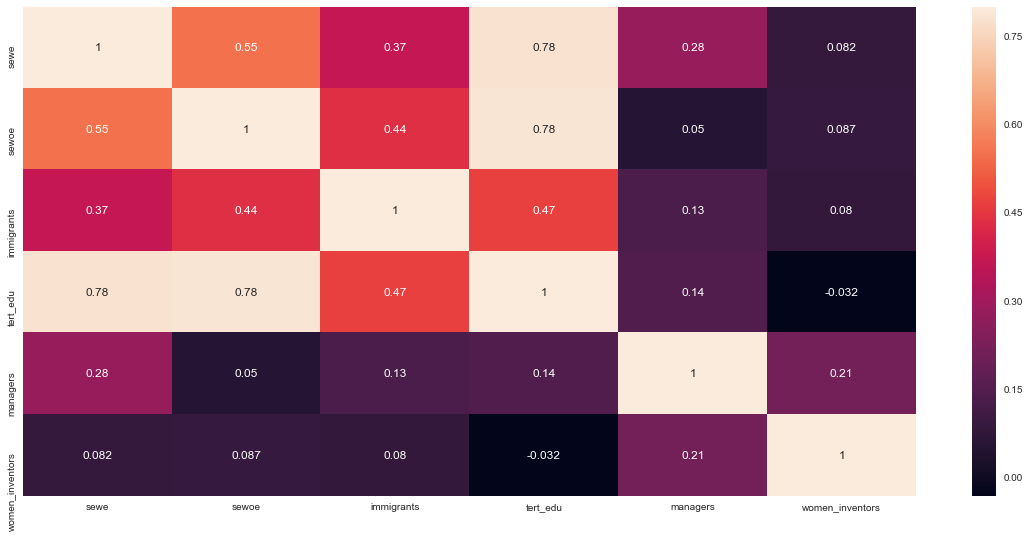

In [496]:
#correlation matrix
data = merged3[['Sex','sewe','sewoe','immigrants','tert_edu','managers', 'women_inventors']]
# data.head()
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

# corrmat = merged3.corr()
# f, ax = plt.subplots(figsize=(20, 9))
# sns.heatmap(corrmat, vmax=.8, annot=True);

In [497]:
corrmat

,sewe,sewoe,immigrants,tert_edu,managers,women_inventors
sewe,1.000000,0.551154,0.368255,0.778989,0.281797,0.082103
sewoe,0.551154,1.000000,0.437953,0.784736,0.049702,0.087079
immigrants,0.368255,0.437953,1.000000,0.466450,0.131703,0.079514
tert_edu,0.778989,0.784736,0.466450,1.000000,0.140593,-0.032053
managers,0.281797,0.049702,0.131703,0.140593,1.000000,0.212726
women_inventors,0.082103,0.087079,0.079514,-0.032053,0.212726,1.000000


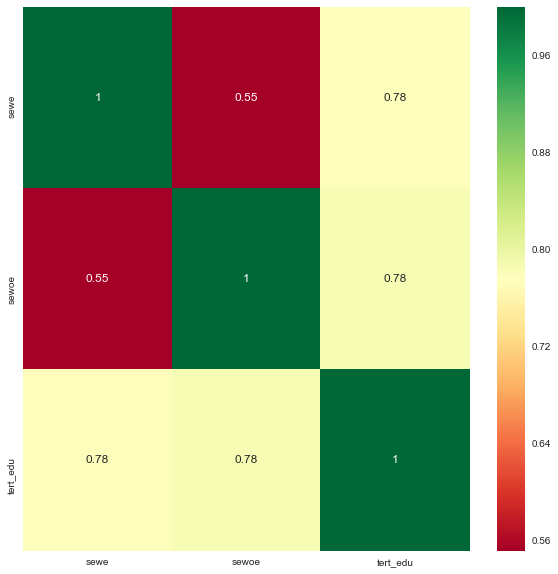

In [499]:
# most correlated features
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["tert_edu"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

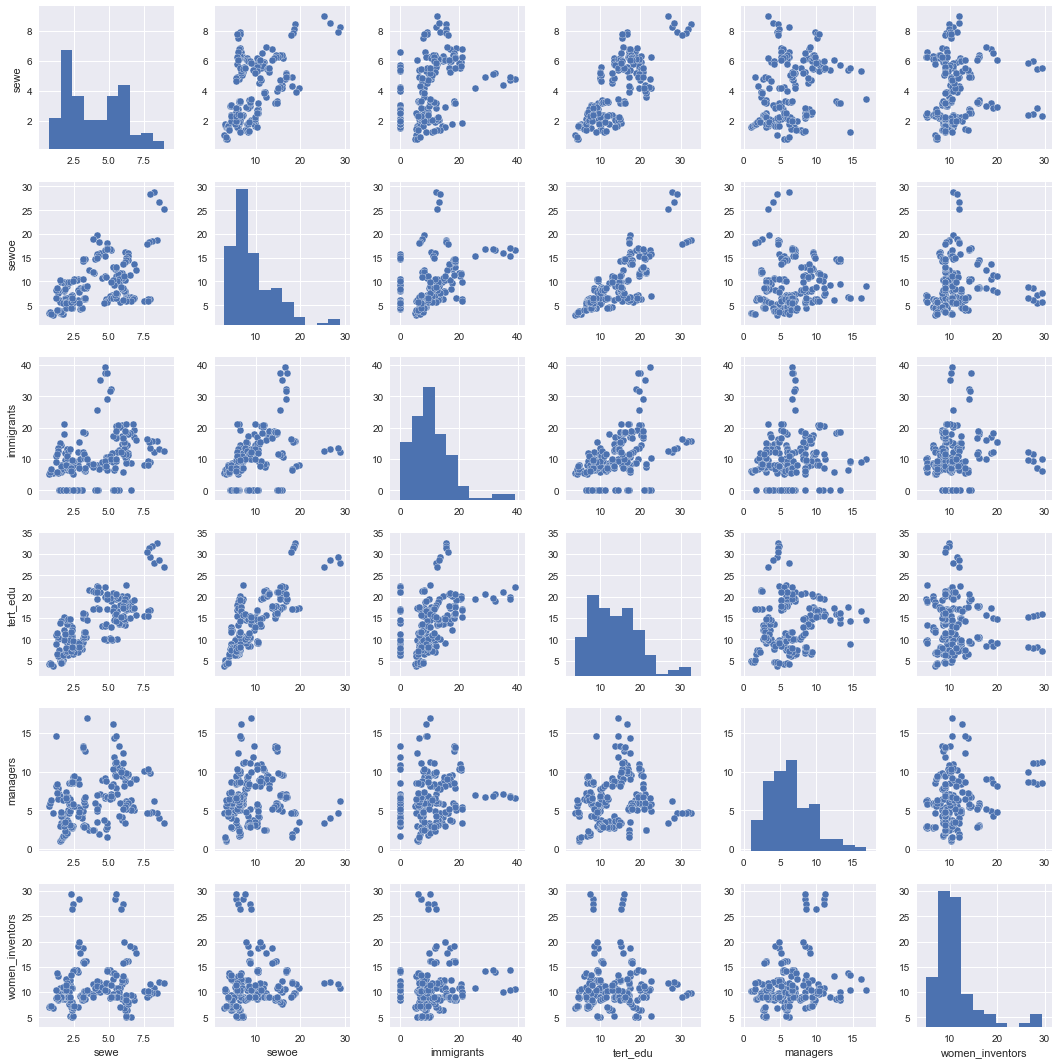

In [500]:
# A quick view of all the important features
sns.set()
cols = ['Sex','sewe','sewoe','immigrants','tert_edu','managers', 'women_inventors']
sns.pairplot(merged3[cols], size = 2.5)
plt.show();

In [535]:
# fg = sns.FacetGrid(data=self_employed[self_employed.LOCATION=='USA'], hue='Sex', aspect=1.61)
# fg.map(plt.plot, 'Time', 'Value').add_legend()
# plt.title("Share of self employed in USA")
# x=[2013,2014,2015,2016]
# plt.xticks(x)
# plt.ylabel("% population")

 #### Share of self-employed in the population of 20-29 year old employed, by sex
 
 Number of young self-employed (20-29) divided by the total number of young employed (20-29), multiplied by 100.
 
 https://stats.oecd.org/index.aspx?queryid=54681

In [399]:
young_self_employed = pd.read_csv("data/GENDER_ENT1_07072018194703000.csv",
                                 usecols=['LOCATION', 'Country', 'Sex','Time','Value'])

young_self_employed = young_self_employed.rename(columns = {'Value':'young_self_employed'})

young_self_employed.head()

,LOCATION,Country,Sex,Time,young_self_employed
0,AUT,Austria,Women,2007,2.704210
1,BEL,Belgium,Men,2000,8.908279
2,BEL,Belgium,Men,2001,7.949056
3,BEL,Belgium,Men,2002,8.171995
4,BEL,Belgium,Men,2003,6.975698


Text(0.5,22.96,'')

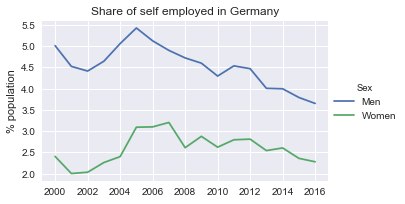

In [542]:
fg = sns.FacetGrid(data=young_self_employed[young_self_employed.LOCATION=='DEU'], hue='Sex', aspect=1.61)
fg.map(plt.plot, 'Time', 'young_self_employed').add_legend()
plt.title("Share of self employed in Germany")
plt.ylabel("% population")
plt.xlabel("")

#### The Programme for International Student Assessment (PISA)

http://www.oecd.org/pisa/

In [292]:
PISA_Reading = pd.read_csv("data/DP_LIVE_07072018195552234.csv", 
                  usecols=['LOCATION','SUBJECT','TIME','Value'])

PISA_Reading.columns = ['LOCATION','Sex','Time','Reading_Score']

PISA_Math = pd.read_csv("data/DP_LIVE_07072018195848121.csv",
                       usecols=['LOCATION','SUBJECT','TIME','Value'])

PISA_Math.columns = ['LOCATION','Sex','Time','Math_Score']

PISA_Science = pd.read_csv("data/DP_LIVE_07072018200049454.csv",
                          usecols=['LOCATION','SUBJECT','TIME','Value'])

PISA_Science.columns = ['LOCATION','Sex','Time','Science_Score']

In [298]:
PISA_merged = pd.merge(PISA_Reading,PISA_Math, on=['LOCATION','Sex','Time'], how='inner')
PISA_merged = pd.merge(PISA_merged,PISA_Science, on=['LOCATION','Sex','Time'], how='inner')

PISA_merged[PISA_merged.LOCATION == 'USA']

,LOCATION,Sex,Time,Reading_Score,Math_Score,Science_Score
230,USA,BOY,2009,488.000,497.000,509.000
231,USA,BOY,2012,482.498,483.647,496.529
232,USA,BOY,2015,487.000,474.000,500.000
233,USA,GIRL,2009,513.000,477.000,495.000
234,USA,GIRL,2012,513.269,478.995,498.325
235,USA,GIRL,2015,507.000,465.000,493.000
415,USA,TOT,2009,500.000,487.000,502.000
416,USA,TOT,2012,498.000,481.000,497.000
417,USA,TOT,2015,497.000,470.000,496.000


In [305]:
Sex_dict = {'BOY':'Male', 'GIRL':'Female', 'TOT':'Total'}
PISA_merged["Sex"].replace(Sex_dict, inplace=True)
PISA_merged[PISA_merged.LOCATION == 'USA']

,LOCATION,Sex,Time,Reading_Score,Math_Score,Science_Score
230,USA,Male,2009,488.000,497.000,509.000
231,USA,Male,2012,482.498,483.647,496.529
232,USA,Male,2015,487.000,474.000,500.000
233,USA,Female,2009,513.000,477.000,495.000
234,USA,Female,2012,513.269,478.995,498.325
235,USA,Female,2015,507.000,465.000,493.000
415,USA,Total,2009,500.000,487.000,502.000
416,USA,Total,2012,498.000,481.000,497.000
417,USA,Total,2015,497.000,470.000,496.000


Text(0.5,22.96,'')

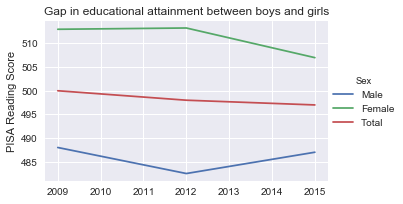

In [548]:
fg = sns.FacetGrid(data=PISA_merged[PISA_merged.LOCATION == 'USA'], hue='Sex', aspect=1.61)
fg.map(plt.plot, 'Time', 'Reading_Score').add_legend()
plt.title("Gap in educational attainment between boys and girls")
plt.ylabel("PISA Reading Score")
plt.xlabel("")

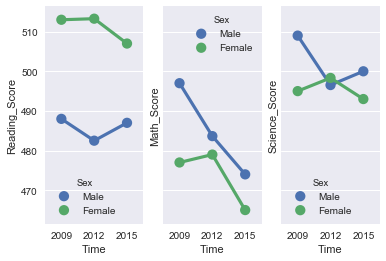

In [634]:
fig, axes = plt.subplots(1,3, sharex=True, sharey=True)

sns.pointplot(y='Reading_Score', x='Time', data=PISA_merged[(PISA_merged.LOCATION == 'USA')&(PISA_merged.Sex != 'Total')], hue='Sex', ax=axes[0])
sns.pointplot(y='Math_Score', x='Time', data=PISA_merged[(PISA_merged.LOCATION == 'USA')&(PISA_merged.Sex != 'Total')], hue='Sex', ax=axes[1])
sns.pointplot(y='Science_Score', x='Time', data=PISA_merged[(PISA_merged.LOCATION == 'USA')&(PISA_merged.Sex != 'Total')], hue='Sex', ax=axes[2])

In [635]:
# # f, (ax1, ax2) = plt.subplots(2, sharex=True)
# g = sns.FacetGrid(data=PISA_merged[PISA_merged.LOCATION == 'USA'], col="Sex")
# # g = g.map(plt.plot,'Time','Reading_Score')
# g = g.map(plt.plot, 'Time', 'Math_Score')

In [636]:
merged3.head(1)

,LOCATION,Sex,Time,sewe,sewoe,Country,immigrants,tert_edu,managers,women_inventors
0,AUT,Men,2013,6.262011,7.044762,Austria,10.25048,22.71456,5.8,5.18376


In [638]:
# the prediction target, y
y = merged3.tert_edu

# the predictors
predictor_cols = ['sewe', 'sewoe', 'immigrants', 'managers']

X = merged3[predictor_cols]

# import library
from sklearn.tree import DecisionTreeRegressor

# Define model
entrepreneurship_model = DecisionTreeRegressor()

# Fit model
entrepreneurship_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [639]:
# split into training and validation data
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both predictors and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

# Define model
entrepreneurship_model = DecisionTreeRegressor()

# Fit model
entrepreneurship_model.fit(train_X, train_y)

# get predicted education on validation data
val_predictions = entrepreneurship_model.predict(val_X)

# Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(val_y, val_predictions))

0.9793029795918367
